In [1]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from tabulate import tabulate

#  Mount Google Drive
drive.mount('/content/drive')
#  Set the path to your CSV file
file_path = '/content/drive/MyDrive/Obesity prediction_1.csv'

#  Read the CSV file
df = pd.read_csv(file_path)

#  Basic checks
print(" Dataset Loaded Successfully!\n")
print("Shape:", df.shape)#how many rows,colums
print(tabulate(df.head(10), headers='keys', tablefmt='pretty'))


Mounted at /content/drive
 Dataset Loaded Successfully!

Shape: (2111, 17)
+---+--------+------+--------+--------+----------------+------+------+-----+-----------+-------+------+-----+-----+-----+------------+-----------------------+---------------------+
|   | Gender | Age  | Height | Weight | family_history | FAVC | FCVC | NCP |   CAEC    | SMOKE | CH2O | SCC | FAF | TUE |    CALC    |        MTRANS         |       Obesity       |
+---+--------+------+--------+--------+----------------+------+------+-----+-----------+-------+------+-----+-----+-----+------------+-----------------------+---------------------+
| 0 | Female | 21.0 |  1.62  |  64.0  |      yes       |  no  | 2.0  | 3.0 | Sometimes |  no   | 2.0  | no  | 0.0 | 1.0 |     no     | Public_Transportation |    Normal_Weight    |
| 1 | Female | 21.0 |  1.52  |  56.0  |      yes       |  no  | 3.0  | 3.0 | Sometimes |  yes  | 3.0  | yes | 3.0 | 0.0 | Sometimes  | Public_Transportation |    Normal_Weight    |
| 2 |  Male  | 23.0 

In [2]:
#  Basic info about dataset
print("\n Dataset Info:")
df.info()

#  Summary statistics for numerical columns
print("\n Summary Statistics (Numerical Features):")
print(df.describe())

#  Summary for categorical columns
print("\n Summary Statistics (Categorical Features):")
print(df.describe(include=['object']))

#  Check for missing/null values
print("\n Missing Values per Column:")
print(df.isnull().sum())

#  Display only columns with missing values (if any)
missing = df.isnull().sum()
missing_cols = missing[missing > 0]
if len(missing_cols) > 0:
    print("\n Columns with Missing Values:",missing_cols)
else:
    print("\n No Missing Values Found in the Dataset.")


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), ob

Columns containing zero values:

TUE    557
FAF    411
dtype: int64


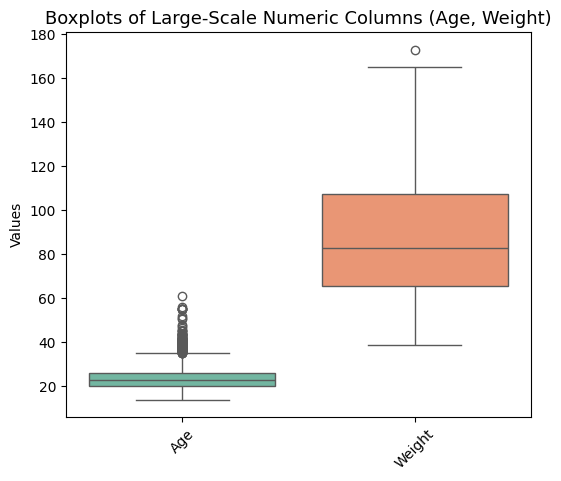

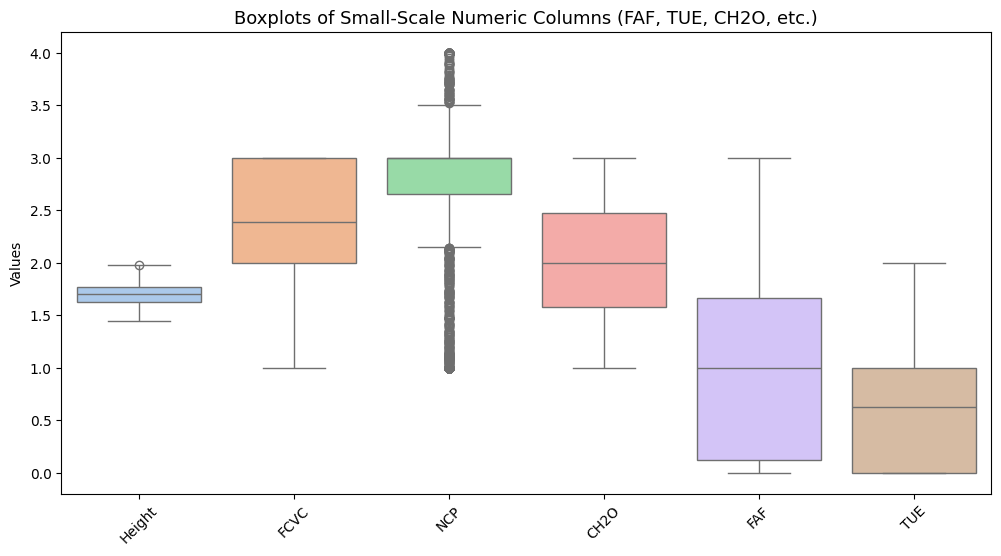

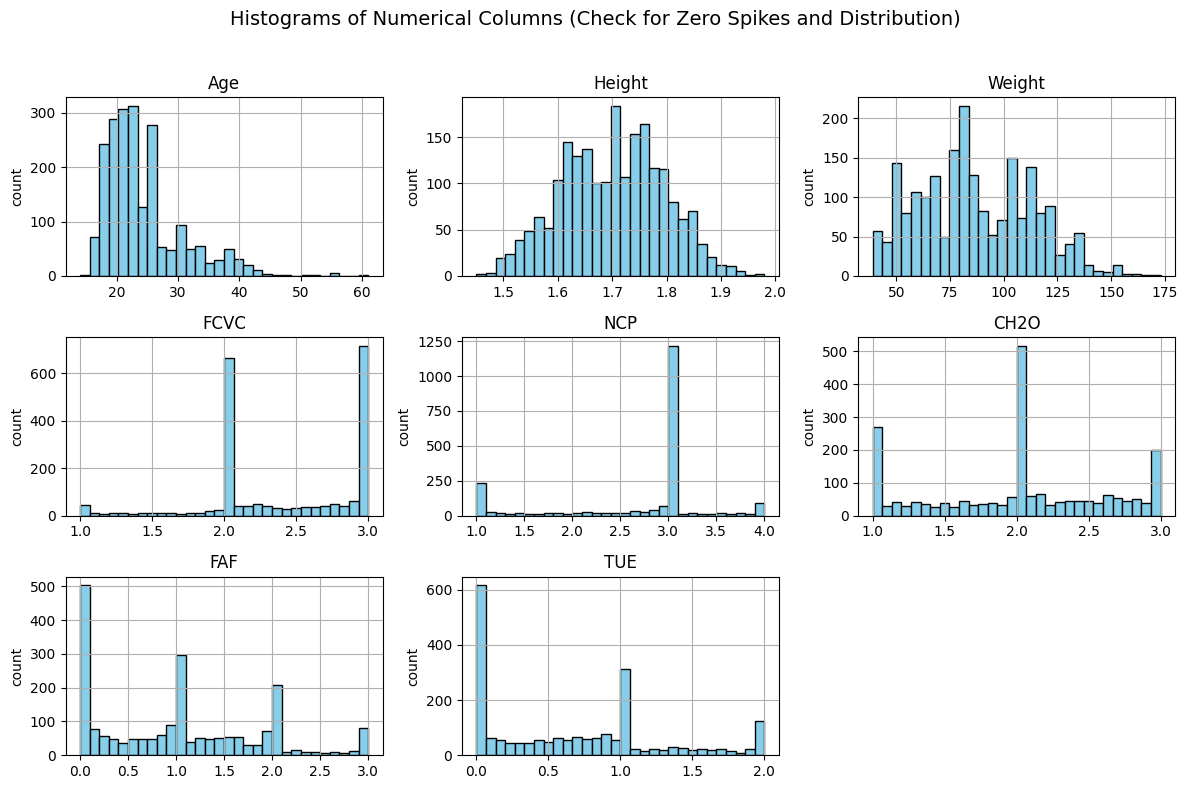

In [3]:
#  Two Boxplots for Numeric Columns (Large vs Small) + Zero Count + Histogram View

# Step 1: Create a copy and select numeric columns
df_numeric = df.copy()
numeric_cols = df_numeric.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Count zeros in each numeric column
zero_counts = (df_numeric[numeric_cols] == 0).sum()

# Step 3: Display columns that contain zeros
print("Columns containing zero values:\n")
print(zero_counts[zero_counts > 0].sort_values(ascending=False))

# Step 4: Optional message if no zeros found
if (zero_counts == 0).all():
    print("\n No zero values found in any numeric column.")

# Step 5: Split columns into large-scale and small-scale groups
large_cols = ['Age', 'Weight']  # Big numeric values
small_cols = [col for col in numeric_cols if col not in large_cols]

# ---  Boxplot for Large-Scale Numeric Columns ---
plt.figure(figsize=(6,5))
sns.boxplot(data=df_numeric[large_cols], palette='Set2')
plt.title('Boxplots of Large-Scale Numeric Columns (Age, Weight)', fontsize=13)
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# ---  Boxplot for Small-Scale Numeric Columns ---
plt.figure(figsize=(12,6))
sns.boxplot(data=df_numeric[small_cols], palette='pastel')
plt.title('Boxplots of Small-Scale Numeric Columns (FAF, TUE, CH2O, etc.)', fontsize=13)
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# ---  Histogram view to see zero spikes and distributions ---
fig = df_numeric[numeric_cols].hist(
    figsize=(12, 8),
    bins=30,
    color='skyblue',
    edgecolor='black'
)

# Add y-axis label "Count" to every histogram
for ax in fig.flatten():
    ax.set_ylabel("count")

plt.suptitle(
    'Histograms of Numerical Columns (Check for Zero Spikes and Distribution)',
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # prevent title overlap
plt.show()



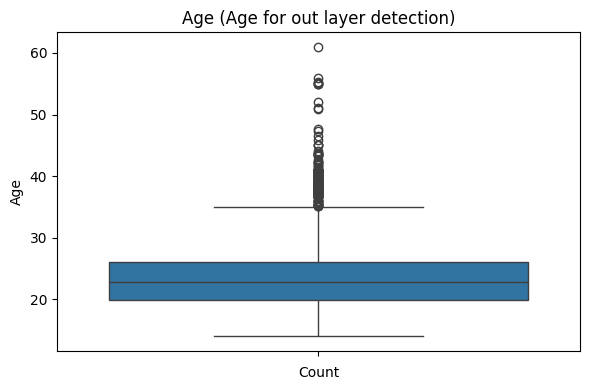

In [5]:
# ==========================================================
# Box Plot of Age for out layer detection
# ==========================================================

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Age'])
plt.title("Age (Age for out layer detection)")
plt.ylabel("Age")
plt.xlabel("Count")
plt.tight_layout()
plt.show()


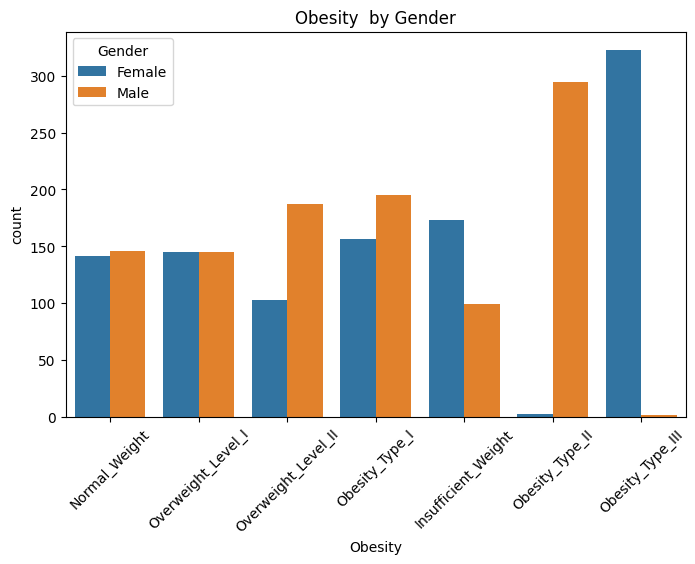

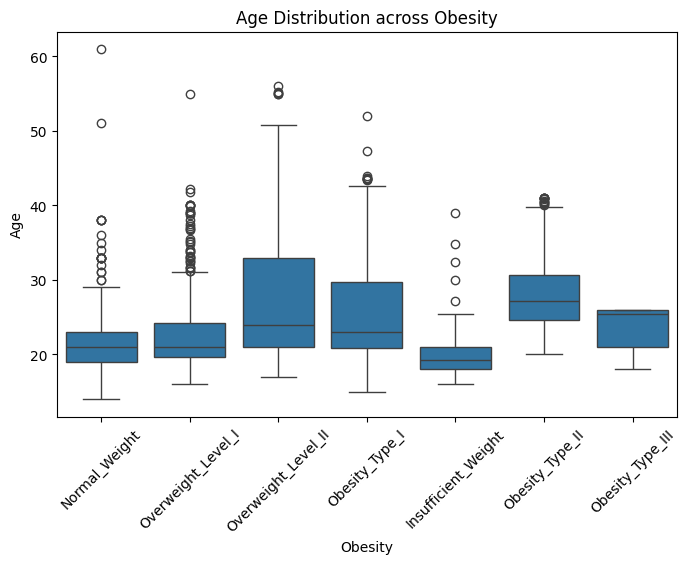

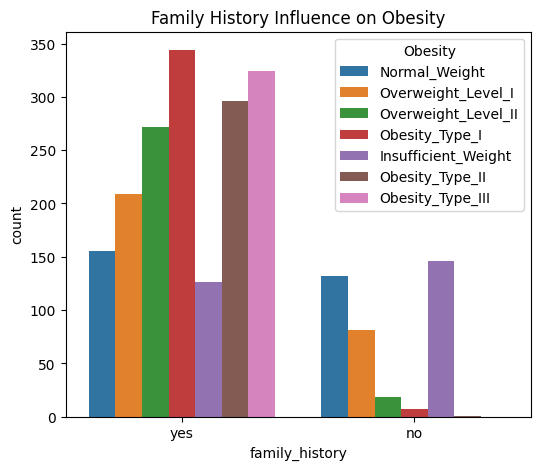

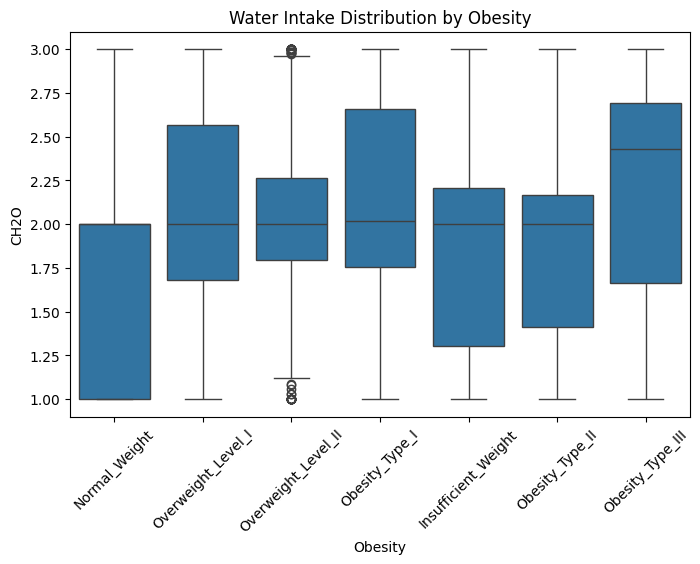

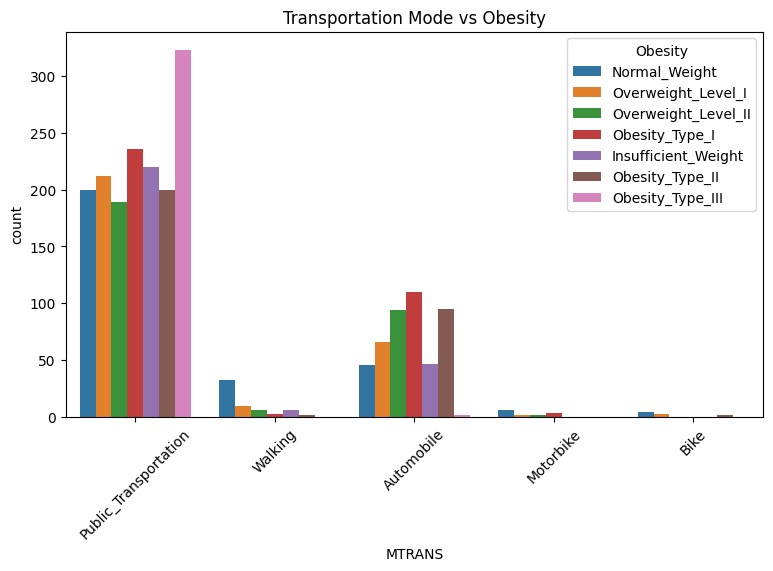

In [6]:
#  Gender vs Obesity Level
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Obesity', hue='Gender')
plt.title("Obesity  by Gender")
plt.xticks(rotation=45)
plt.show()

# Age Distribution by Obesity Level
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Obesity', y='Age')
plt.title("Age Distribution across Obesity")
plt.xticks(rotation=45)
plt.show()

#  Family History vs Obesity Level
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='family_history', hue='Obesity')
plt.title("Family History Influence on Obesity")
plt.show()

#  Water Intake vs Obesity Level
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Obesity', y='CH2O')
plt.title("Water Intake Distribution by Obesity")
plt.xticks(rotation=45)
plt.show()

# Transportation Mode vs Obesity Level
plt.figure(figsize=(9,5))
sns.countplot(data=df, x='MTRANS', hue='Obesity')
plt.title("Transportation Mode vs Obesity")
plt.xticks(rotation=45)
plt.show()


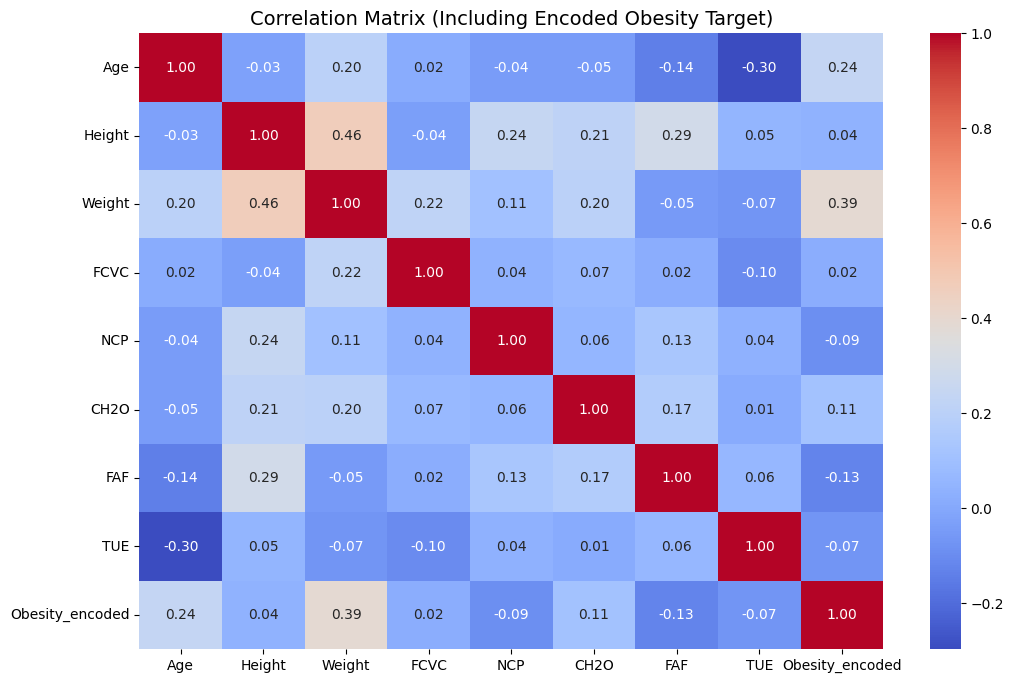

Top correlated features with Obesity (encoded):

Obesity_encoded    1.00
Weight             0.39
Age                0.24
CH2O               0.11
Height             0.04
FCVC               0.02
TUE               -0.07
NCP               -0.09
FAF               -0.13
Name: Obesity_encoded, dtype: float64
Top correlated features with Obesity (encoded):



,Correlation
Obesity_encoded,1.000000
Weight,0.390000
Age,0.240000
CH2O,0.110000
Height,0.040000
FCVC,0.020000
TUE,-0.070000
NCP,-0.090000
FAF,-0.130000


In [7]:
# ===========================================================
# Encode Categorical Target + Correlation Matrix
# ===========================================================

# Encode the target column 'Obesity'
df['Obesity_encoded'] = df['Obesity'].astype('category').cat.codes

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Add the encoded target column for correlation
numeric_df['Obesity_encoded'] = df['Obesity_encoded']

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# 5 Plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Including Encoded Obesity Target)", fontsize=14)
plt.show()

# Identify top correlated features with target
target_col = 'Obesity_encoded'
target_corr = corr_matrix[target_col].sort_values(ascending=False).round(2)

print("Top correlated features with Obesity (encoded):\n")
print(target_corr.head(10))
print("Top correlated features with Obesity (encoded):\n")
display(target_corr.head(10).to_frame(name='Correlation').style.background_gradient(cmap='coolwarm'))



In [9]:
# ------------------------------
# Core Libraries
# ------------------------------
from scipy.stats import entropy, uniform, randint

# ------------------------------
# Scikit-Learn: Models
# ------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# ------------------------------
# Scikit-Learn: Data Handling
# ------------------------------
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    learning_curve
)

# ------------------------------
# Scikit-Learn: Preprocessing
# ------------------------------
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ------------------------------
# Scikit-Learn: Metrics
# ------------------------------
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)


# ------------------------------------------------------------
# Load and Prepare Dataset
# ------------------------------------------------------------
df = df.drop_duplicates()      # remove duplicate rows
target = 'Obesity'

X = df.drop(columns=[target])   # all features
y = df[target]

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split dataset (keeps same class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ------------------------------------------------------------
# Preprocessing: Categorical + Numerical
# ------------------------------------------------------------
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

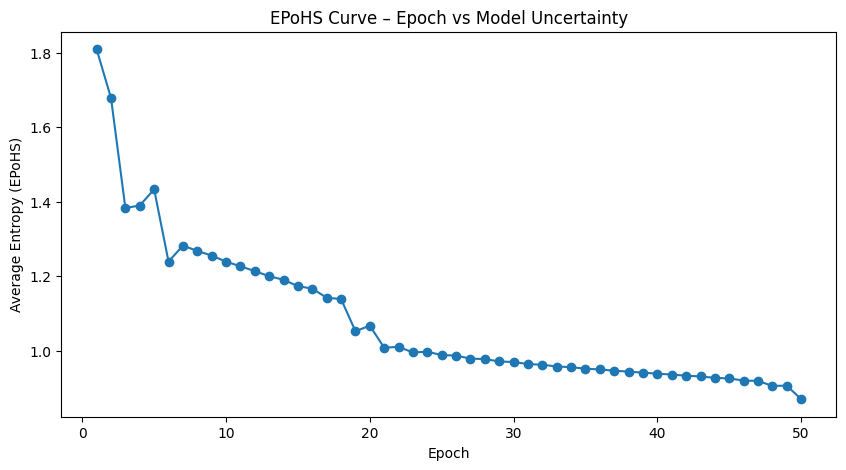

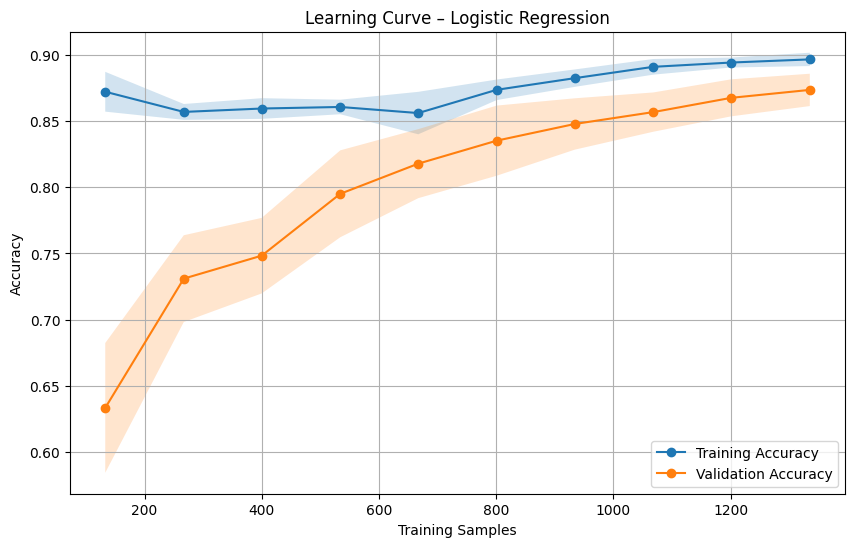

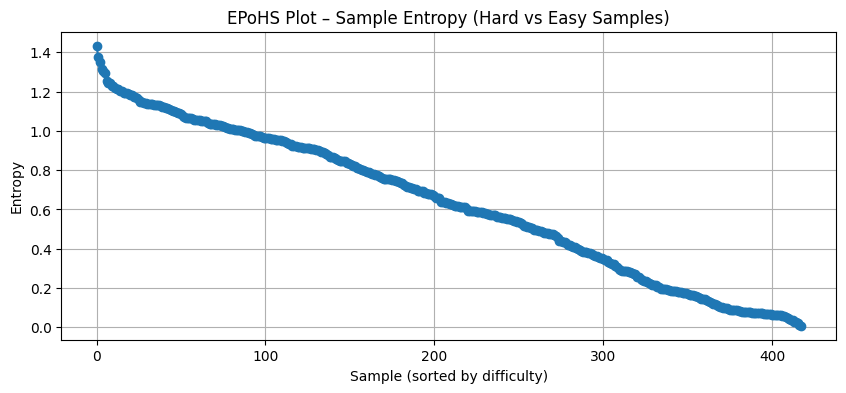


Top 10 Hardest Samples (Indexes in Test Set):
[  0 362  24 168 122 177 104 272 137 240]
=== Logistic Regression (Obesity Classification) ===
Accuracy : 0.8971
Precision: 0.8950
Recall   : 0.8971
F1 Score : 0.8954

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      1.00      0.97        53
      Normal_Weight       0.84      0.82      0.83        57
     Obesity_Type_I       0.92      0.93      0.92        70
    Obesity_Type_II       0.94      1.00      0.97        60
   Obesity_Type_III       0.98      0.98      0.98        65
 Overweight_Level_I       0.80      0.80      0.80        55
Overweight_Level_II       0.82      0.72      0.77        58

           accuracy                           0.90       418
          macro avg       0.89      0.89      0.89       418
       weighted avg       0.89      0.90      0.90       418



In [10]:
# ============================================================
# LOGISTIC REGRESSION - For Obesity Classification
# ============================================================

# ----------------------------
#  1.Logistic Regression pipeline
# ----------------------------
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto'))
])

# ----------------------------
#  2.Train and evaluate
# ----------------------------
logreg_pipeline.fit(X_train, y_train)
y_pred = logreg_pipeline.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')


# ============================================================
# 3.EPOCH vs EPoHS (Entropy) Plot
# ============================================================

epochs = 50
avg_entropy_per_epoch = []

# New logistic regression model with warm_start
logreg_epoch_model = LogisticRegression(
    max_iter=1,             # train 1 iteration per loop
    warm_start=True,        # keep updating weights
    solver='lbfgs',
    multi_class='auto'
)

# Epoch loop
for ep in range(epochs):

    # Train for ONE epoch
    logreg_epoch_model.fit(X_train_processed := preprocessor.fit_transform(X_train), y_train)

    # Predict probabilities on test data
    X_test_processed = preprocessor.transform(X_test)
    y_proba = logreg_epoch_model.predict_proba(X_test_processed)

    # Compute entropy for every test sample
    ent = entropy(y_proba.T)

    # Store average entropy of this epoch
    avg_entropy_per_epoch.append(np.mean(ent))

# ---------------------
# 4.Plot EPOCH vs ENTROPY
# ---------------------
plt.figure(figsize=(10,5))
plt.plot(range(1, epochs+1), avg_entropy_per_epoch, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Average Entropy (EPoHS)")
plt.title("EPoHS Curve – Epoch vs Model Uncertainty")
plt.show()

# ============================================================
#  5.Training vs Validation Accuracy Plot (Learning Curve)
# ============================================================
train_sizes, train_scores, val_scores = learning_curve(
    estimator=logreg_pipeline,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10) #“Use 10 different training sizes, starting from 10% up to 100%, to plot the learning curve like nraly 1000.”
)

train_mean = train_scores.mean(axis=1)
val_mean   = val_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
val_std    = val_scores.std(axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy")
plt.plot(train_sizes, val_mean, 'o-', label="Validation Accuracy")

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2)

plt.title("Learning Curve – Logistic Regression")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

# ============================================================
#  6.EPoHS Plot – Entropy of Test Predictions
# ============================================================
y_proba = logreg_pipeline.predict_proba(X_test)

ent = entropy(y_proba.T)       # compute entropy for each sample
sorted_idx = np.argsort(ent)[::-1]  # sort hardest → easiest

plt.figure(figsize=(10,4))
plt.plot(ent[sorted_idx], marker='o')
plt.title("EPoHS Plot – Sample Entropy (Hard vs Easy Samples)")
plt.xlabel("Sample (sorted by difficulty)")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()

# Print hardest samples
print("\nTop 10 Hardest Samples (Indexes in Test Set):")
print(sorted_idx[:10])

# ============================================================
#  7.Print results
# ============================================================
print("=== Logistic Regression (Obesity Classification) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


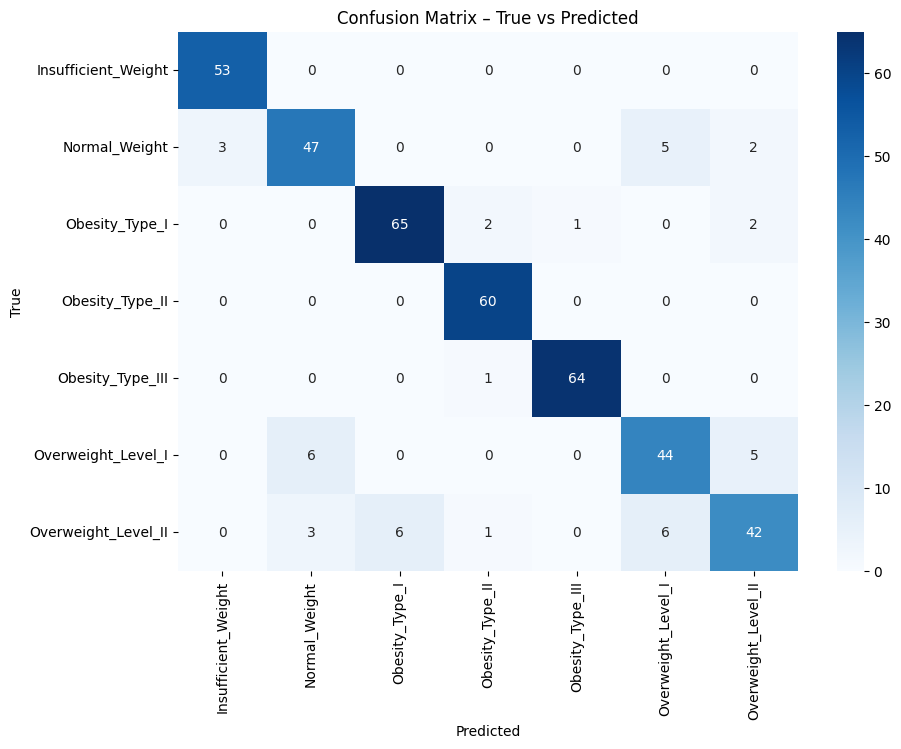

In [11]:
# ============================================================
#  Confusion Matrix (Correlation Matrix)
# ============================================================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – True vs Predicted")
plt.show()


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Best Parameters: {'clf__C': 100, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'clf__solver': 'saga'}

=== Logistic Regression (Best Model) ===
Accuracy : 0.9522
Precision: 0.9523
Recall   : 0.9522
F1 Score : 0.9520

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        53
      Normal_Weight       0.98      0.95      0.96        57
     Obesity_Type_I       0.94      0.94      0.94        70
    Obesity_Type_II       0.94      0.98      0.96        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.93      0.91      0.92        55
Overweight_Level_II       0.91      0.90      0.90        58

           accuracy                           0.95       418
          macro avg       0.95      0.95      0.95       418
       weighted avg       0.95      0.95      0.95       418


Confusion Matrix:
[[53  0  0  0  0  0  0]
 [ 2 54  0  0  0  1  0]
 [ 0  0 6

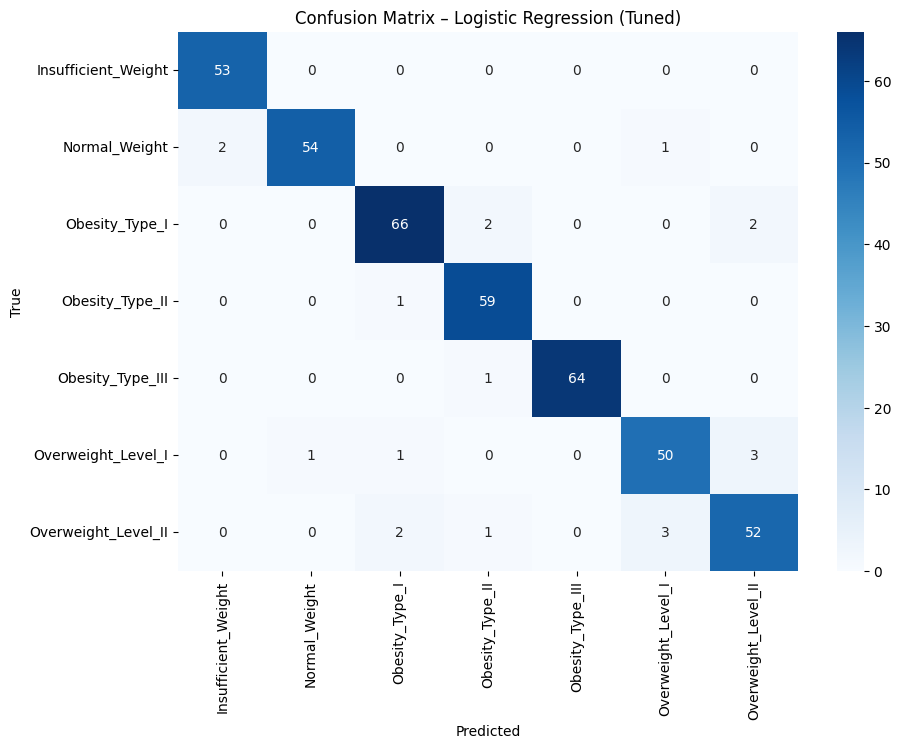


False Predictions:
    Index           True Class      Predicted Class
0     134       Obesity_Type_I      Obesity_Type_II
1     344     Obesity_Type_III      Obesity_Type_II
2      39  Overweight_Level_II       Obesity_Type_I
3     326        Normal_Weight  Insufficient_Weight
4      30   Overweight_Level_I        Normal_Weight
5     203       Obesity_Type_I  Overweight_Level_II
6     751   Overweight_Level_I  Overweight_Level_II
7     362   Overweight_Level_I  Overweight_Level_II
8      70  Overweight_Level_II       Obesity_Type_I
9    1000  Overweight_Level_II   Overweight_Level_I
10    423  Overweight_Level_II   Overweight_Level_I
11    267  Overweight_Level_II   Overweight_Level_I
12    161  Overweight_Level_II      Obesity_Type_II
13    215        Normal_Weight   Overweight_Level_I
14    186       Obesity_Type_I  Overweight_Level_II
15    257       Obesity_Type_I      Obesity_Type_II
16     68      Obesity_Type_II       Obesity_Type_I
17    497        Normal_Weight  Insufficient

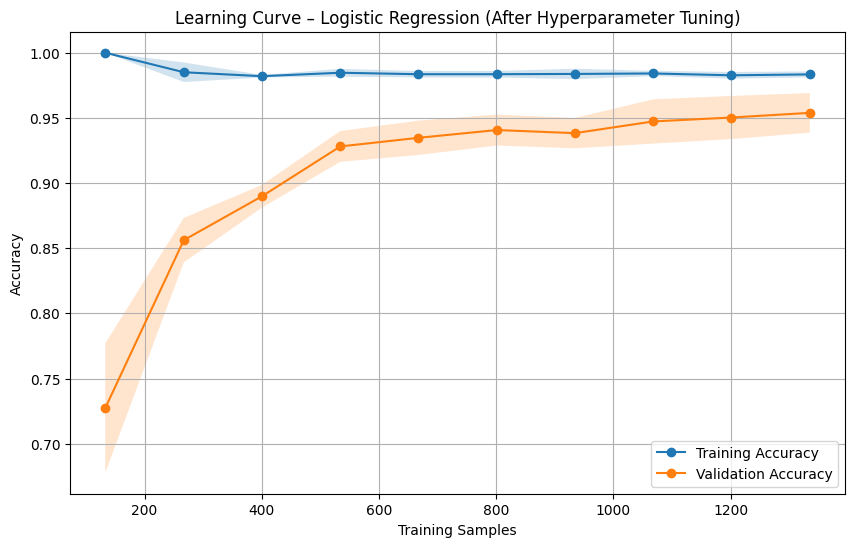

In [12]:
# ============================================================
# LOGISTIC REGRESSION with Hyperparameter Tuning - Obesity Classification
# ============================================================


# ----------------------------
#  1.Base Logistic Regression model
# ----------------------------
logreg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', logreg)
])

# ----------------------------
#  2.Hyperparameter tuning (GridSearchCV)
# ----------------------------
param_grid = {
    'clf__penalty': ['l2'],
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__solver': ['lbfgs', 'saga'],
    'clf__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# ----------------------------
#  3.Best model evaluation
# ----------------------------
print("\nBest Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print("\n=== Logistic Regression (Best Model) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ------------------------------------------------------------
# 4.Confusion Matrix
# ------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# ------------------------------------------------------------
# 5.Confusion Matrix Heatmap (Correlation Matrix)
# ------------------------------------------------------------
plt.figure(figsize=(10,7))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Logistic Regression (Tuned)")
plt.show()

# ------------------------------------------------------------
# 6.False Predictions Table
# ------------------------------------------------------------
true_labels = le.inverse_transform(y_test)
pred_labels = le.inverse_transform(y_pred)

false_rows = []
for true, pred, idx in zip(true_labels, pred_labels, X_test.index):
    if true != pred:
        false_rows.append([idx, true, pred])

false_df = pd.DataFrame(false_rows, columns=["Index", "True Class", "Predicted Class"])

print("\nFalse Predictions:")
print(false_df)

# ============================================================
#  7.TRAINING vs VALIDATION CURVE (Learning Curve)
# ============================================================

train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# 8.Mean and Std
train_mean = train_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
val_mean   = val_scores.mean(axis=1)
val_std    = val_scores.std(axis=1)

# Plot
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy")
plt.plot(train_sizes, val_mean, 'o-', label="Validation Accuracy")

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2)

plt.title("Learning Curve – Logistic Regression (After Hyperparameter Tuning)")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()


=== Gradient Boosting Classifier (Obesity Classification) ===
Accuracy : 0.9809
Precision: 0.9810
Recall   : 0.9809
F1 Score : 0.9809

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        53
      Normal_Weight       0.96      0.95      0.96        57
     Obesity_Type_I       1.00      0.99      0.99        70
    Obesity_Type_II       0.98      1.00      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.93      0.95      0.94        55
Overweight_Level_II       0.98      1.00      0.99        58

           accuracy                           0.98       418
          macro avg       0.98      0.98      0.98       418
       weighted avg       0.98      0.98      0.98       418


Confusion Matrix:
[[53  0  0  0  0  0  0]
 [ 0 54  0  0  0  3  0]
 [ 0  0 69  0  0  1  0]
 [ 0  0  0 60  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  2  0  0  0 52  1]
 [ 0 

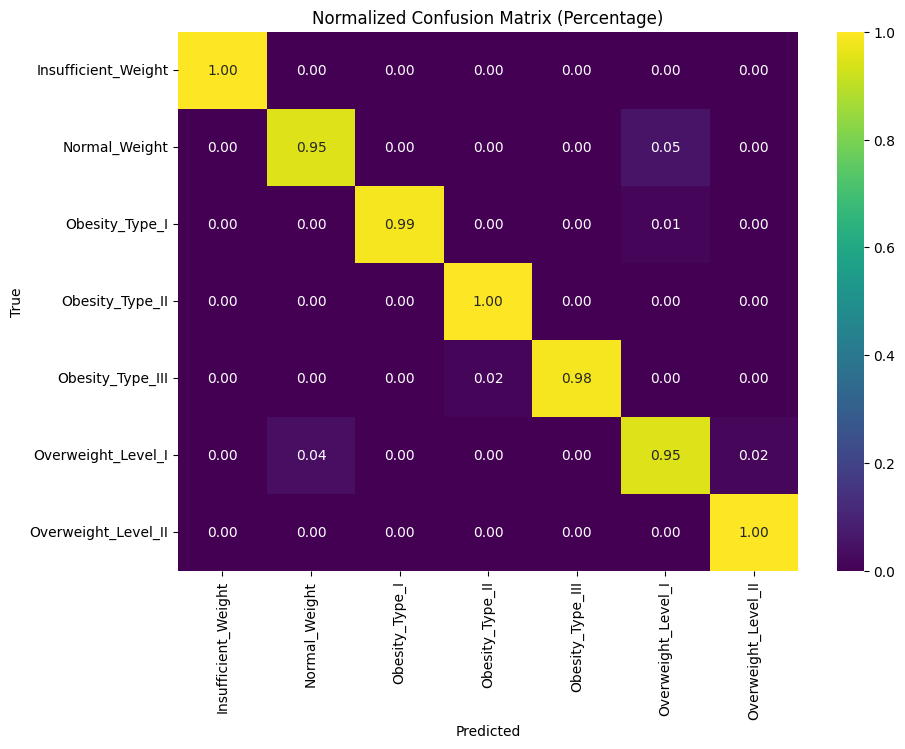


False Predictions:
   Index          True Class      Predicted Class
0    344    Obesity_Type_III      Obesity_Type_II
1    751  Overweight_Level_I  Overweight_Level_II
2     65  Overweight_Level_I        Normal_Weight
3    215       Normal_Weight   Overweight_Level_I
4    408       Normal_Weight   Overweight_Level_I
5    255  Overweight_Level_I        Normal_Weight
6   1355      Obesity_Type_I   Overweight_Level_I
7    216       Normal_Weight   Overweight_Level_I


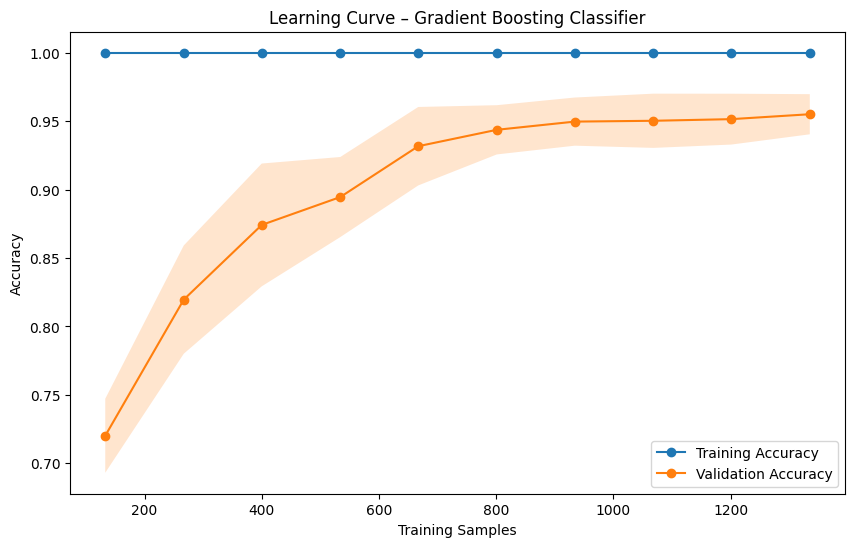

In [13]:
# ============================================================
# GRADIENT BOOSTING CLASSIFIER - Obesity Dataset
# ============================================================


# ------------------------------------------------------------
#  1.Build Gradient Boosting Pipeline
# ------------------------------------------------------------
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gb', GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

# ------------------------------------------------------------
#  2.Train Model
# ------------------------------------------------------------
gb_pipeline.fit(X_train, y_train)

# ------------------------------------------------------------
#  3.Predictions & Evaluation
# ------------------------------------------------------------
y_pred = gb_pipeline.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print("=== Gradient Boosting Classifier (Obesity Classification) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ------------------------------------------------------------
# 4.Confusion Matrix
# ------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# ------------------------------------------------------------
# 5.Confusion Matrix
# ------------------------------------------------------------
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,7))
sns.heatmap(
    cm_norm,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Normalized Confusion Matrix (Percentage)")
plt.show()

# ------------------------------------------------------------
# 6.False Predictions Table
# ------------------------------------------------------------
true_labels = le.inverse_transform(y_test)
pred_labels = le.inverse_transform(y_pred)

false_rows = []
for true, pred, idx in zip(true_labels, pred_labels, X_test.index):
    if true != pred:
        false_rows.append([idx, true, pred])

false_df = pd.DataFrame(false_rows, columns=["Index", "True Class", "Predicted Class"])
print("\nFalse Predictions:")
print(false_df)

# ============================================================
# 7.TRAINING VS VALIDATION ACCURACY (LEARNING CURVE)
# ============================================================

train_sizes, train_scores, val_scores = learning_curve(
    estimator=gb_pipeline,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
val_mean   = val_scores.mean(axis=1)
val_std    = val_scores.std(axis=1)

# 8.Plot learning curve
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy")
plt.plot(train_sizes, val_mean, 'o-', label="Validation Accuracy")

plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std,
                 val_mean + val_std, alpha=0.2)

plt.title("Learning Curve – Gradient Boosting Classifier")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits

=== Best Hyperparameters Found ===
{'gb__learning_rate': np.float64(0.1929989973347863), 'gb__max_depth': 5, 'gb__min_samples_leaf': 3, 'gb__min_samples_split': 7, 'gb__n_estimators': 180, 'gb__subsample': np.float64(0.777633994480005)}

=== Gradient Boosting Classifier (Best Tuned Model) ===
Accuracy : 0.9785
Precision: 0.9793
Recall   : 0.9785
F1 Score : 0.9786

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        53
      Normal_Weight       0.98      0.95      0.96        57
     Obesity_Type_I       1.00      0.96      0.98        70
    Obesity_Type_II       0.97      1.00      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.92      0.98      0.95        55
Overweight_Level_II       0.98      0.98      0.98        58

           accuracy                           0.98       

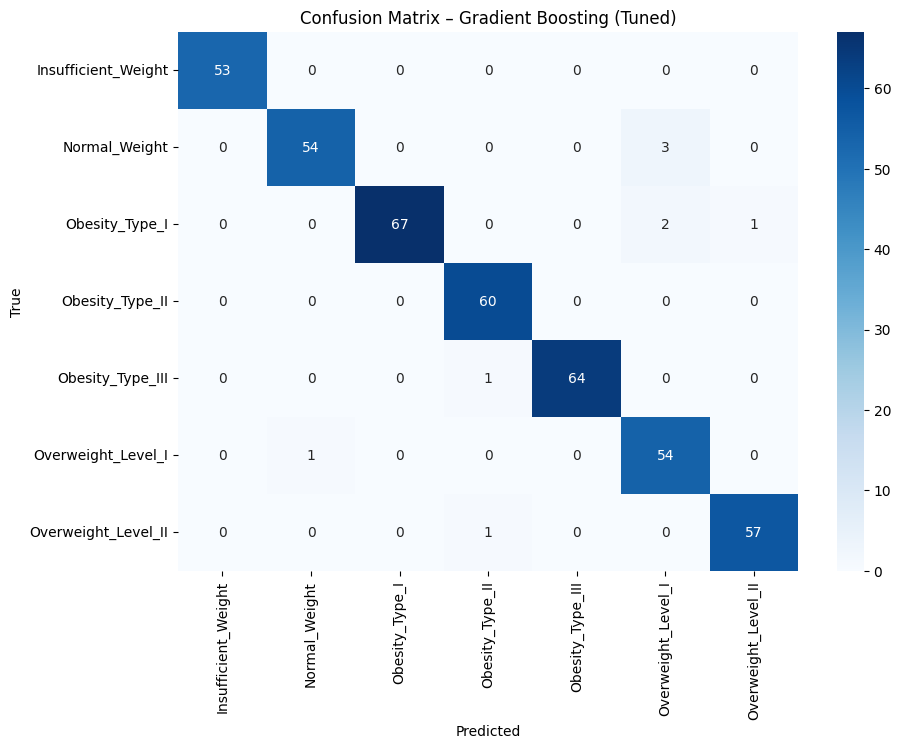

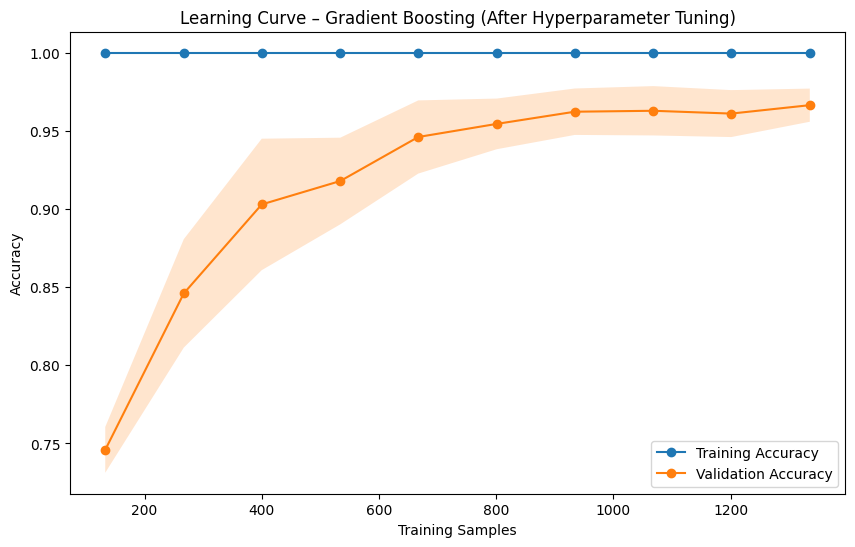

In [14]:
# ============================================================
# GRADIENT BOOSTING CLASSIFIER with RandomizedSearchCV - Obesity Dataset
# ============================================================

# ------------------------------------------------------------
# 1. Pipeline = Preprocessing + Gradient Boosting model
# ------------------------------------------------------------
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gb', GradientBoostingClassifier(random_state=42))
])

# ------------------------------------------------------------
# 2. Hyperparameter Search Space
#  RandomizedSearchCV tries random combinations → faster than GridSearch
# ------------------------------------------------------------
param_dist = {
    'gb__n_estimators': randint(100, 500),
    'gb__learning_rate': uniform(0.01, 0.3),
    'gb__max_depth': randint(2, 6),
    'gb__min_samples_split': randint(2, 10),
    'gb__min_samples_leaf': randint(1, 6),
    'gb__subsample': uniform(0.7, 0.3)  # between 0.7 and 1.0
}

# ------------------------------------------------------------
# 3. RandomizedSearchCV (20 random combinations, 5-fold CV)
# ------------------------------------------------------------
random_search = RandomizedSearchCV(
    estimator=gb_pipeline,
    param_distributions=param_dist,
    n_iter=20,                       # try 20 random combinations
    cv=5,                            # 5-fold cross-validation
    scoring='f1_weighted',           # good for imbalanced multi-class
    verbose=2,
    n_jobs=-1,                       # use all CPUs
    random_state=42
)

# ------------------------------------------------------------
# 4. Train the model (this tunes hyperparameters automatically)
# ------------------------------------------------------------
random_search.fit(X_train, y_train)

print("\n=== Best Hyperparameters Found ===")
print(random_search.best_params_)

# Best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# ------------------------------------------------------------
# 5. Evaluate model on test set
# ------------------------------------------------------------
y_pred = best_model.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print("\n=== Gradient Boosting Classifier (Best Tuned Model) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ------------------------------------------------------------
# 6. Confusion Matrix
# ------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=le.classes_, yticklabels=le.classes_
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Gradient Boosting (Tuned)")
plt.show()

# ------------------------------------------------------------
# 7. Training vs Validation Accuracy Curve (Learning Curve)
# ------------------------------------------------------------
# learning_curve trains model on different % of training data:
# e.g., 10%, 20%, ... 100%

train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)  # 10 sizes from 10% to 100%
)

# Average across folds
train_mean = train_scores.mean(axis=1)
val_mean   = val_scores.mean(axis=1)

train_std = train_scores.std(axis=1)
val_std   = val_scores.std(axis=1)

# Plot learning curve
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy")
plt.plot(train_sizes, val_mean, 'o-', label="Validation Accuracy")

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2)

plt.title("Learning Curve – Gradient Boosting (After Hyperparameter Tuning)")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


=== SVM Classifier (Obesity Classification) ===
Accuracy : 0.9450
Precision: 0.9448
Recall   : 0.9450
F1 Score : 0.9449

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.96      0.95        53
      Normal_Weight       0.88      0.86      0.87        57
     Obesity_Type_I       0.97      0.97      0.97        70
    Obesity_Type_II       0.98      1.00      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.89      0.89      0.89        55
Overweight_Level_II       0.93      0.93      0.93        58

           accuracy                           0.94       418
          macro avg       0.94      0.94      0.94       418
       weighted avg       0.94      0.94      0.94       418



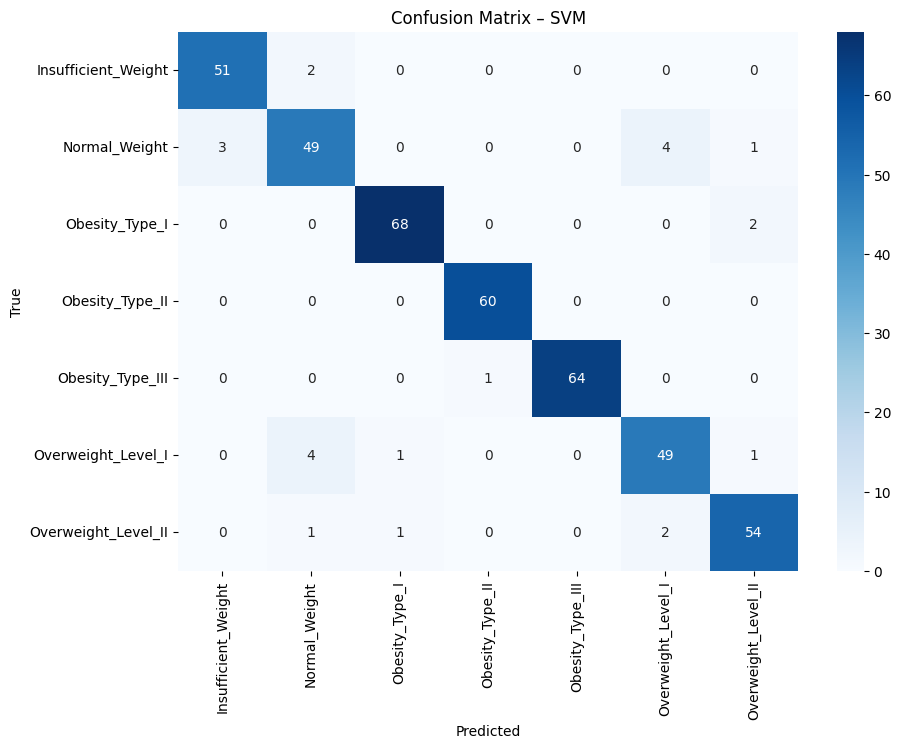

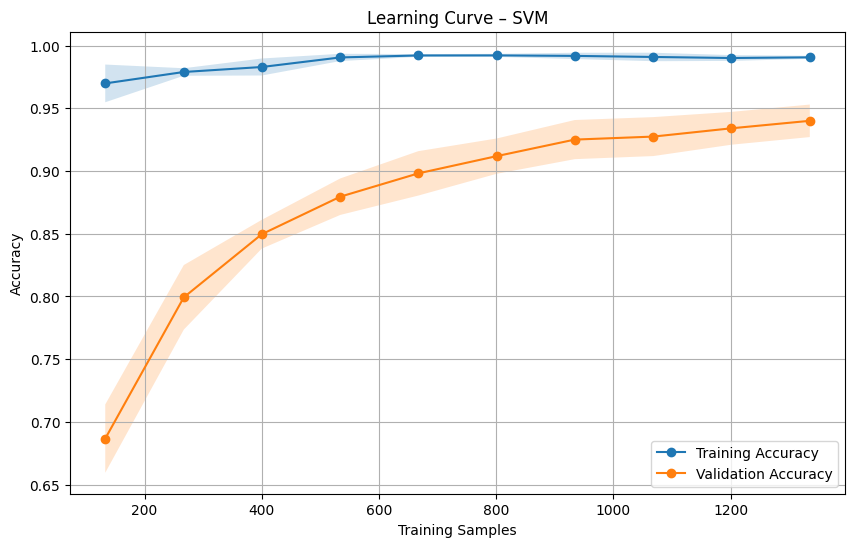

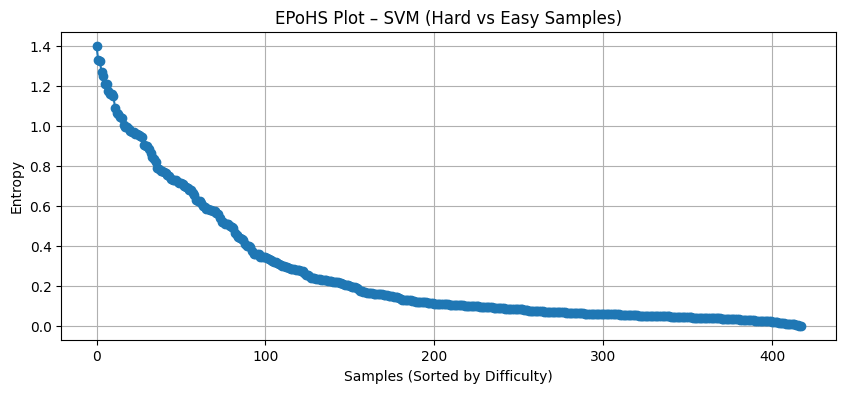


Top 10 Hardest Samples:
[151  68 274 179 128 127 339 154 168 362]


In [15]:
# ============================================================
# SVM (Support Vector Machine) - Obesity Classification
# ============================================================


# ------------------------------------------------------------
# 1. SVM Model Pipeline
# ------------------------------------------------------------
# probability=True  enables predict_proba() for EPoHS entropy plot
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', SVC(kernel='rbf', probability=True, C=3, gamma='scale')) #C=3  allow less misclassification (moderate regularization),gamma='scale' automatically balanced influence of each data point
])

# ------------------------------------------------------------
# 2. Train Model
# ------------------------------------------------------------
svm_pipeline.fit(X_train, y_train)

# ------------------------------------------------------------
# 3. Predictions
# ------------------------------------------------------------
y_pred = svm_pipeline.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print("=== SVM Classifier (Obesity Classification) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ------------------------------------------------------------
# 4. Confusion Matrix Heatmap
# ------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – SVM")
plt.show()

# ------------------------------------------------------------
# 5. Learning Curve (Training vs Validation Accuracy)
# ------------------------------------------------------------
train_sizes, train_scores, val_scores = learning_curve(
    estimator=svm_pipeline,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
val_mean   = val_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
val_std    = val_scores.std(axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy")
plt.plot(train_sizes, val_mean, 'o-', label="Validation Accuracy")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2)
plt.title("Learning Curve – SVM")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

# ------------------------------------------------------------
# 6. EPoHS Plot (Entropy-Based Hard Sample Detection)
# ------------------------------------------------------------
y_proba = svm_pipeline.predict_proba(X_test)

ent = entropy(y_proba.T)                 # Entropy for each sample
sorted_idx = np.argsort(ent)[::-1]       # Hardest samples first

plt.figure(figsize=(10,4))
plt.plot(ent[sorted_idx], marker='o')
plt.title("EPoHS Plot – SVM (Hard vs Easy Samples)")
plt.xlabel("Samples (Sorted by Difficulty)")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()

print("\nTop 10 Hardest Samples:")
print(sorted_idx[:10])